# Developing and Tuning Machine Learning Models for Real-Time Stress Level Prediction

In the modern world, stress has become a significant concern for both individuals and organizations. High-stress levels can affect employees' productivity, students' academic performance, and people's overall well-being. With the increasing availability of wearable devices, mobile health applications, and fitness trackers, it is now possible to monitor physical and mental health data in real-time. By leveraging machine learning, we can predict an individual's stress level based on physiological and environmental factors such as heart rate, physical activity, and environmental factors like noise and temperature.

Scenario:
Imagine you are working as a data scientist at a health-tech company that focuses on developing wearable devices to monitor stress levels. Your team is tasked with building a machine learning model that can predict stress levels based on sensor data collected from individuals during their daily activities. The dataset includes various physiological signals such as heart rate, temperature, body movement, and external factors such as noise and air quality.

The company has developed a new feature to provide personalized feedback to users based on their stress levels, but before launching this feature, you must ensure the accuracy of the stress-level predictions. To achieve this, you will train different machine learning models (e.g., XGBoost, AdaBoost, CatBoost) to predict stress levels, evaluate their performance, and fine-tune the models to improve accuracy.

Detailed Task :
As a data scientist, your task is to develop and evaluate machine learning models to predict stress levels based on physiological and environmental factors. The dataset contains sensor data from wearable devices with the target variable being the individual's stress level. Follow the steps below to complete the task:

1. Load the dataset and perform initial exploratory analysis:

  * Check for any missing values and handle them accordingly.
  * Visualize the correlation between features using a heatmap to understand how they are related to each other and to the target variable.

2. Data Preprocessing:

  * Split the dataset into training (80%) and testing (20%) sets.
  * Ensure the features and target variable (stress_level) are separated correctly.

3. Model Training:

  * Train three different models: XGBoost, AdaBoost, and CatBoost, using the training data.
  * Make predictions on the test data using each trained model.

4. Model Evaluation:

 * Implement a custom evaluation function that calculates the following metrics for each model:
Accuracy
Precision
Recall
F1-Score
Additionally, visualize the confusion matrix for each model to understand the misclassifications.

5. Hyperparameter Tuning:

 * Perform hyperparameter tuning on the XGBoost model using GridSearchCV to find the best parameters for improving the model's accuracy.
 * Re-evaluate the tuned XGBoost model and compare the performance before and after tuning.

6. Final Report:


  * Based on your findings, provide a recommendation on which model performs best in predicting stress levels and explain why.
  * Discuss how the tuned XGBoost model's performance compares to the default version.
  * Summarize the key takeaways from the evaluation metrics, and identify any potential improvements that could be made to further enhance the prediction accuracy.

In [30]:
print("Hello, Begin Your Data Journey")


Hello, Begin Your Data Journey


In [1]:
!pip3 install matplotlib
# !pip install sklearn
!pip3 install seaborn
!pip3 install catboost
!pip3 install xgboost


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
import json
import os
import warnings
warnings.filterwarnings("ignore")

jupyter_notebook_dataset = os.getenv("dataset_url", "https://d3dyfaf3iutrxo.cloudfront.net/general/upload/97c57c3415fd4c1b9d2063c81296e50e.csv")
data = pd.read_csv(jupyter_notebook_dataset)


In [3]:
from xgboost import XGBClassifier

In [4]:
# Display the first 5 rows of the dataset to understand its structure
data.head()


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [5]:
# Display the shape of the dataset to check how many rows and columns it has
data.shape


(1100, 21)

In [6]:
# Check for missing values in the dataset
data.isnull().sum()


anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [7]:
# Display the column names of the dataset
data.columns.tolist()


['anxiety_level',
 'self_esteem',
 'mental_health_history',
 'depression',
 'headache',
 'blood_pressure',
 'sleep_quality',
 'breathing_problem',
 'noise_level',
 'living_conditions',
 'safety',
 'basic_needs',
 'academic_performance',
 'study_load',
 'teacher_student_relationship',
 'future_career_concerns',
 'social_support',
 'peer_pressure',
 'extracurricular_activities',
 'bullying',
 'stress_level']

In [8]:
import seaborn as sns


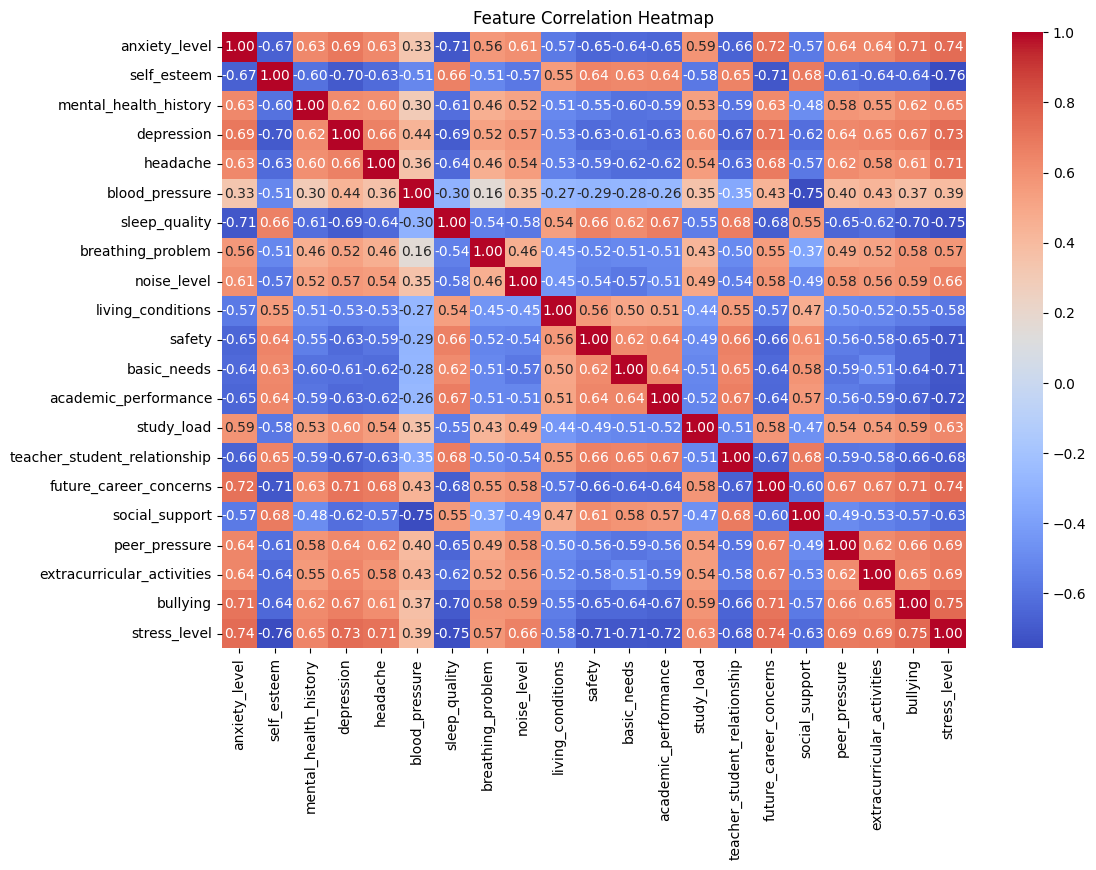

In [9]:
# Calculate the correlation matrix to understand relationships between features
correlation_matrix = data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



In [10]:
df = data
# Define the feature matrix (X) and target vector (y)
X = df.drop(columns=["stress_level"])  # Assuming 'stress_level' is the target variable
y = df["stress_level"]


In [11]:
# Split the dataset into training and testing sets
# 80% of the data will be used for training, and 20% for testing use random_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
# Initialize three different models: XGBoost, AdaBoost, and CatBoost
# XGBoost model
# AdaBoost model
# CatBoost model (with no verbosity)
xgb_model = XGBClassifier(random_state=42)
ada_model = AdaBoostClassifier(random_state=42)
cat_model = CatBoostClassifier(verbose=0, random_state=42)



In [13]:
# Train all the models on the training dataset
xgb_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
cat_model.fit(X_train, y_train)


In [14]:
# Make predictions using the trained models on the testing dataset
#store it in xgb_pred , ada_pred , cat_pred respectively 
xgb_pred = xgb_model.predict(X_test)
ada_pred = ada_model.predict(X_test)
cat_pred = cat_model.predict(X_test)


In [15]:
# Define a function to evaluate each model using various metrics
def evaluate_model(y_test, y_pred, model_name):
    # Calculate and print the accuracy, precision, recall, and F1 score
    
    # Print the evaluation metrics

    # Generate the confusion matrix and visualize it using a heatmap

    # Plot the confusion matrix
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()




Model: XGBoost
Accuracy: 0.8681818181818182
Precision: 0.8695985317531335
Recall: 0.8681818181818182
F1 Score: 0.8681878305197593


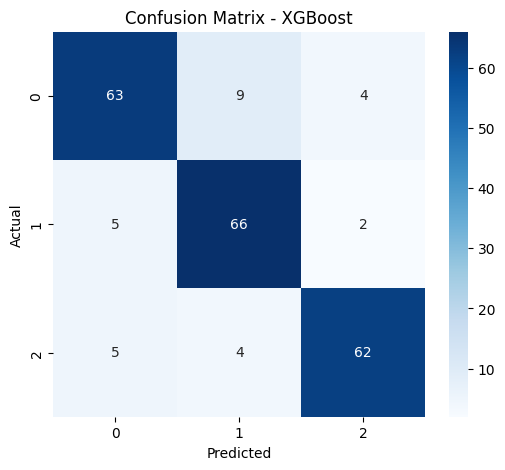


Model: AdaBoost
Accuracy: 0.8818181818181818
Precision: 0.8818859485263594
Recall: 0.8818181818181818
F1 Score: 0.8817695567227424


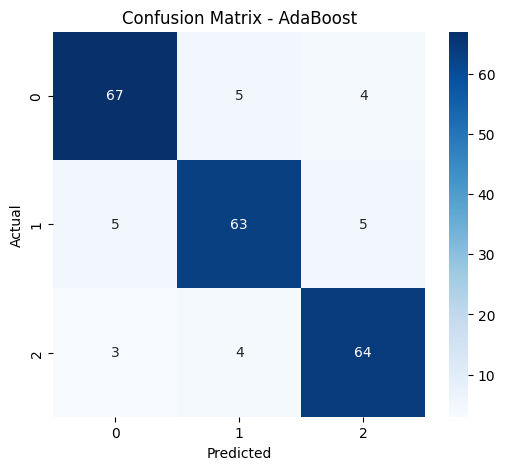


Model: CatBoost
Accuracy: 0.8727272727272727
Precision: 0.8741174426749715
Recall: 0.8727272727272727
F1 Score: 0.8730534355779797


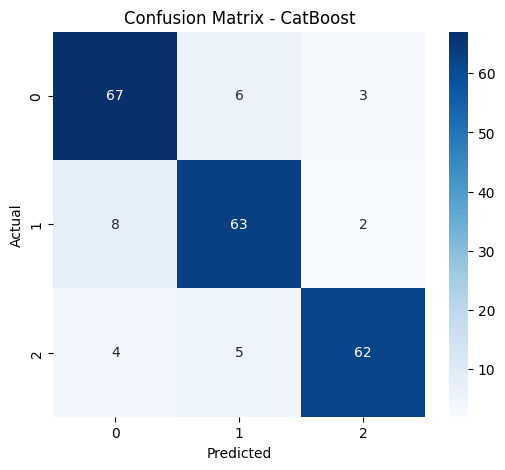

In [16]:
# Evaluate each model using the evaluation function
evaluate_model(y_test, xgb_pred, "XGBoost")
evaluate_model(y_test, ada_pred, "AdaBoost")
evaluate_model(y_test, cat_pred, "CatBoost")


In [17]:
# Create a function that returns the accuracy and take the inpurt paramenter as y_test , y_pred
def get_accuracy(y_test,y_pred):  
    ans = accuracy_score(y_test, y_pred)
    return ans # replace with actual accuracy


In [18]:
#call that function for getting the accuracy for xgboost
#store the output in variabler 'xgb_acc'
xgb_acc = get_accuracy(y_test, xgb_pred)
xgb_acc


0.8681818181818182

In [19]:
#call that function for getting the accuracy for adaboost
#store the output in variabler 'ada_acc'
ada_acc = get_accuracy(y_test, ada_pred)
ada_acc


0.8818181818181818

In [20]:
#call that function for getting the accuracy for catboost
#store the output in variabler 'cat_acc'
cat_acc = get_accuracy(y_test, cat_pred)
cat_acc

0.8727272727272727

In [21]:
# Define the parameter grid for XGBoost to search for the best hyperparameters
grid_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9]
}


In [22]:
# Initialize the XGBoost model
xgb_tuned = XGBClassifier(random_state=42)



In [23]:
# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(xgb_tuned, grid_params, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)



In [24]:
# Fit the model to the training data
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=1)

In [25]:
#show the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


In [26]:
# show the best accuracy score achieved with those parameters

print("Best Accuracy Score:", grid_search.best_score_)


Best Accuracy Score: 0.8965622654067316


In [27]:
# Use the best estimator (model with the best parameters) to make predictions
#store prediction in 'xgb_pred'

best_xgb = grid_search.best_estimator_
xgb_pred = best_xgb.predict(X_test)



Model: Tuned XGBoost
Accuracy: 0.8727272727272727
Precision: 0.8731337403705826
Recall: 0.8727272727272727
F1 Score: 0.872744996733002


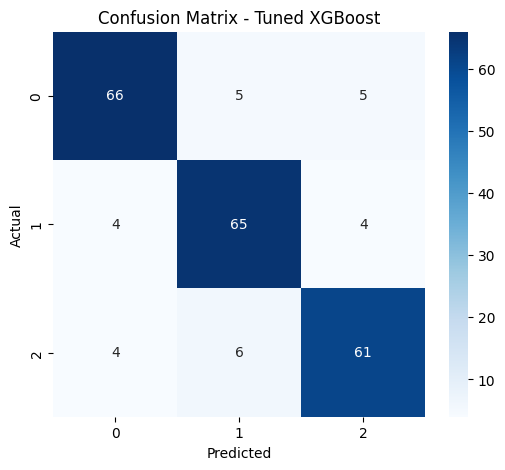

In [28]:
# Evaluate the tuned XGBoost model using the evaluation function
evaluate_model(y_test, xgb_pred, "Tuned XGBoost")


In [29]:
#call that function for getting the final accuracy for xgboost
#store the output in variabler 'xgb_acc_final'
xgb_acc_final = get_accuracy(y_test, xgb_pred)
xgb_acc_final
 

0.8727272727272727